# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [3]:

# import all necesary lib
import os
import pickle
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
#from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import skimage.color
import tensorflow as tf
import pandas as pd
from tensorflow.contrib.layers import flatten
import pickle

training_file = os.path.join('traffic-signs-data','train.p')
valid_file = os.path.join('traffic-signs-data','valid.p')
testing_file = os.path.join('traffic-signs-data','test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(valid_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid= valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:

assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))


# Number of training examples
n_train = len(X_train)
# Number of Validation examples.
n_valid = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

#  What's the shape of an traffic sign image?
image_shape = X_train[0].shape

#  How many unique classes/labels there are in the dataset.
sign_names_file = pd.read_csv("signnames.csv")
n_classes = sign_names_file.shape[0]

print("Number of training examples =", n_train)
print("Number of Valdation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of Valdation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

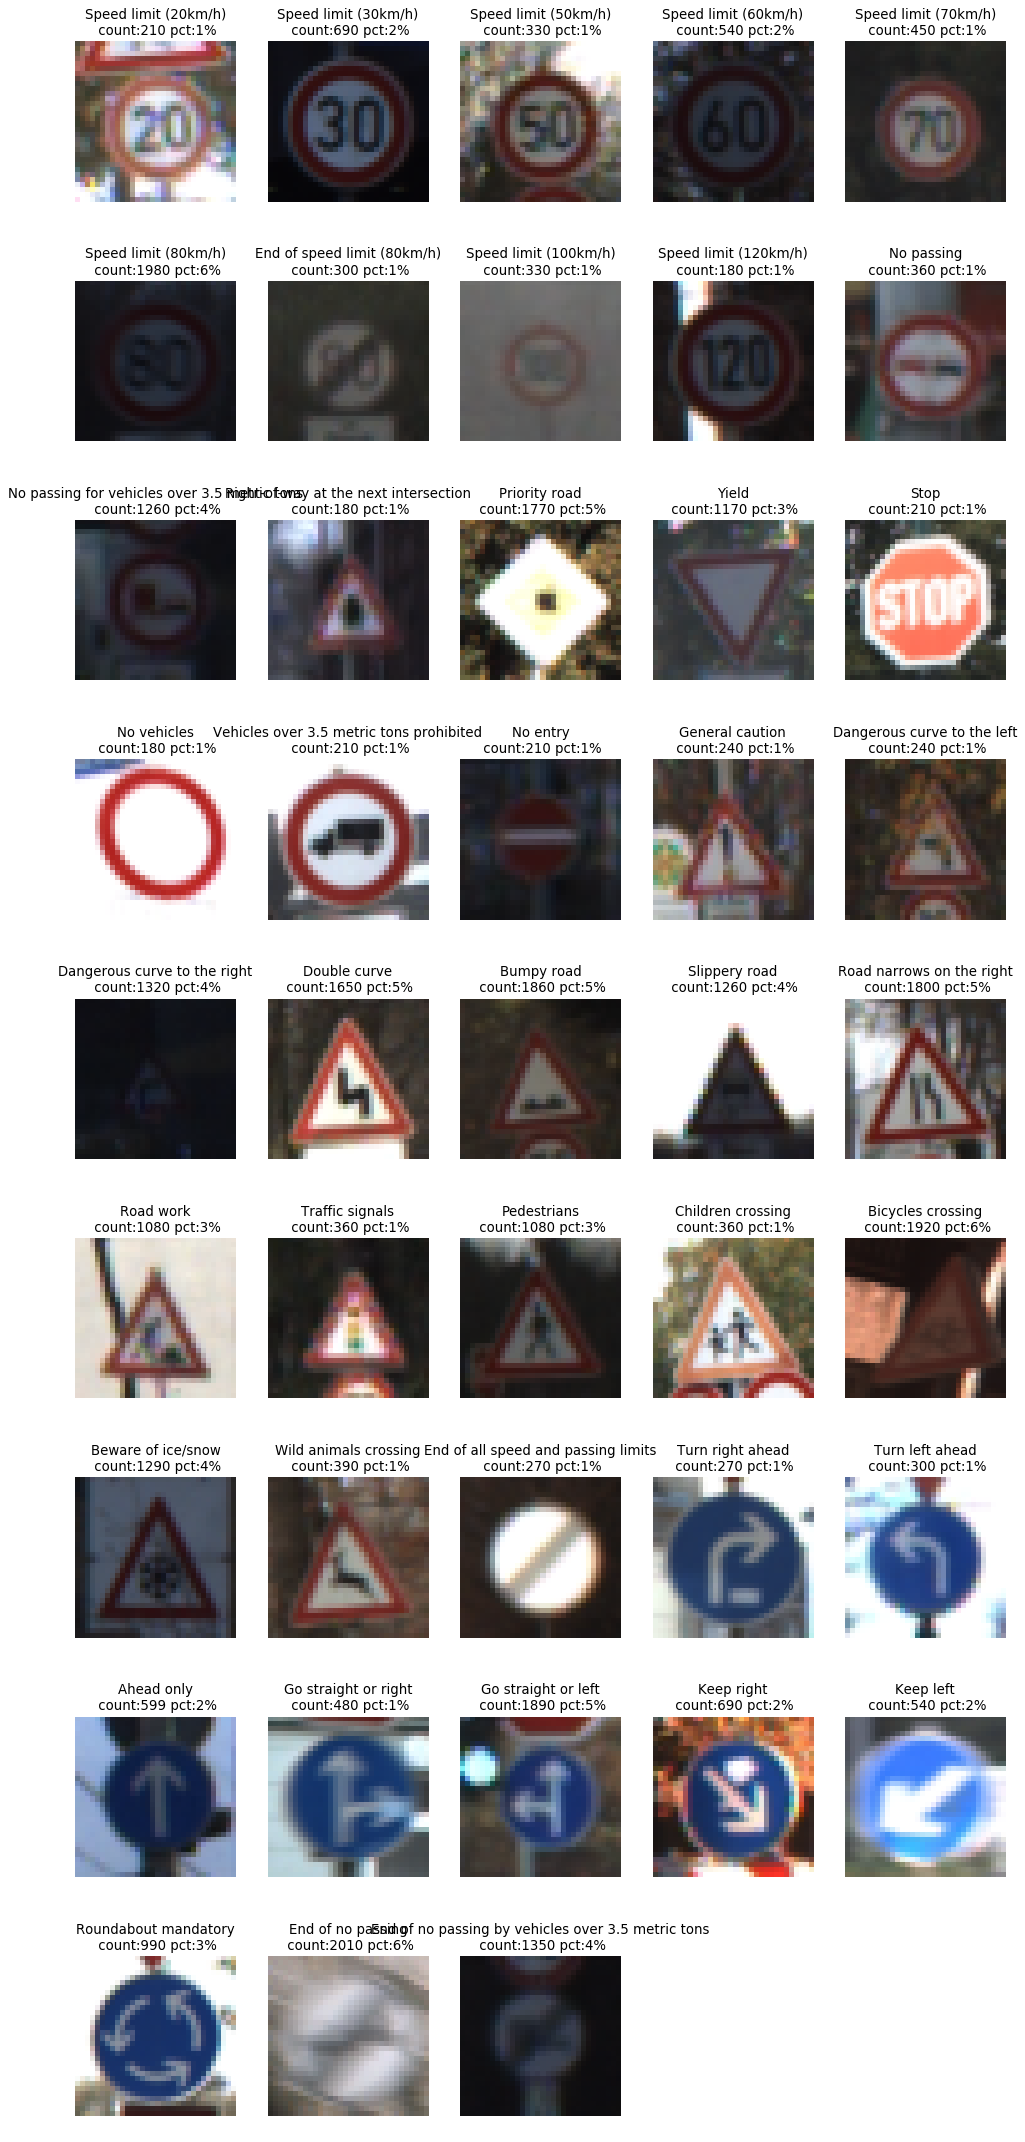

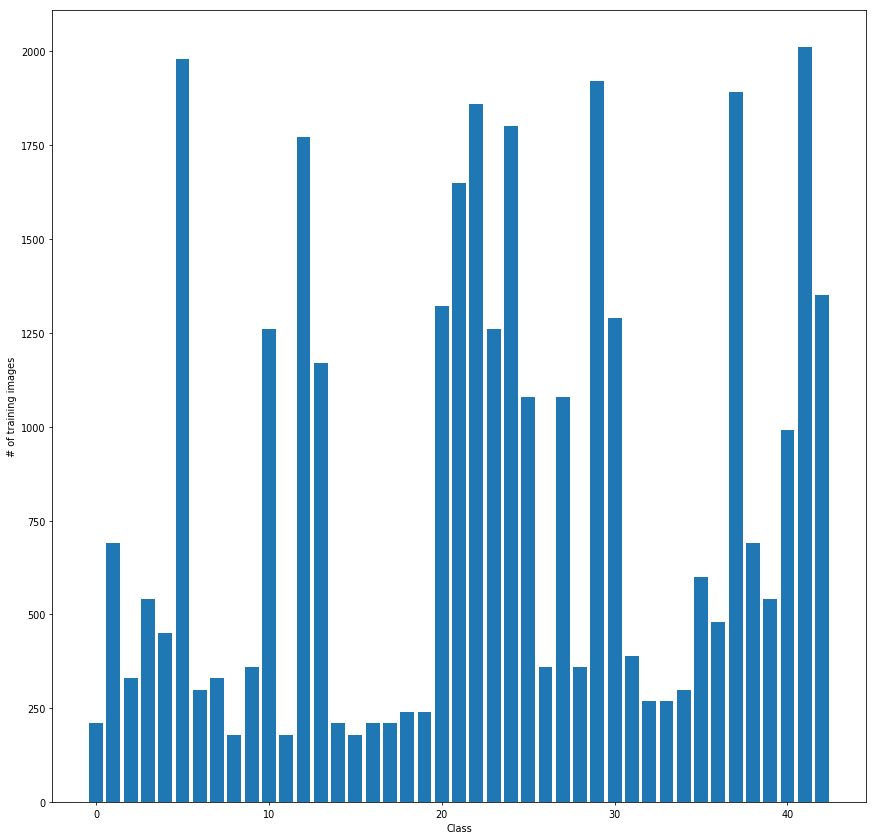

In [14]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from itertools import groupby
# Visualizations will be shown in the notebook.
%matplotlib inline
# number of pics of each class
n_pics_each_class = [len(list(label)) for key, label in groupby(y_train)]
pct_pics_each_class = [len(list(label))/len(y_train) for key, label in groupby(y_train)]

# random pick one picture of each class
plt.figure(figsize=(15,35),dpi=80)
for i in range(n_classes):
    plt.subplot(9,5,i+1)
    X_picked = X_train[y_train == i]
    plt.imshow(X_picked[np.random.randint(len(X_picked)),:,:,:])
    plt.title(sign_names_file['SignName'][i] +"\n count:"+str(n_pics_each_class[i]) + " pct:{0:.0%}".format(pct_pics_each_class[i]))
    plt.axis('off')
plt.show()
# draw bar plot
plt.figure(figsize=(15,15),dpi=70)
plt.bar(range(n_classes), n_pics_each_class)
plt.xlabel("Class")
plt.ylabel("# of training images")
plt.show()


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [15]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.


def normalize(img):
    img = (img- np.mean(img))/(np.std(img)+ np.finfo('float32').eps)
    return img
def to_gray(img):
    return cv2.cvtColor(img,cv2.COLOR_RGB2YUV)[:,:,0]
    #return skimage.color.rgb2gray(img)

def adjust_contract(img):
    return cv2.equalizeHist(img)

def preprocess(X):
    processed_img = np.empty((X.shape[0],X.shape[1],X.shape[2]),dtype=np.float32)
    for i in range(X.shape[0]):
        processed_img[i] = normalize(adjust_contract(to_gray(X[i])))
    return processed_img

def save_processed_imgs(processed_file_name,train,valid,test):
    X_train = preprocess(train)
    X_vaild = preprocess(valid)
    X_test = preprocess(test)
    pickle.dump((X_train, X_vaild, X_test), open(processed_file_name, "wb"))
    print("Saved all preprocessed images!")

save_processed_imgs('preprocessed_imgs.p',X_train,X_valid,X_test)

# processed_img = normalize(adjust_contract(to_gray(X_train[1000])))
# plt.imshow(processed_img,cmap='gray')
# plt.show()

Saved all preprocessed images!


In [75]:
# load preprocessed images
n_classes = 43
(X_train, X_valid, X_test) = pickle.load(open('preprocessed_imgs.p', "rb"))


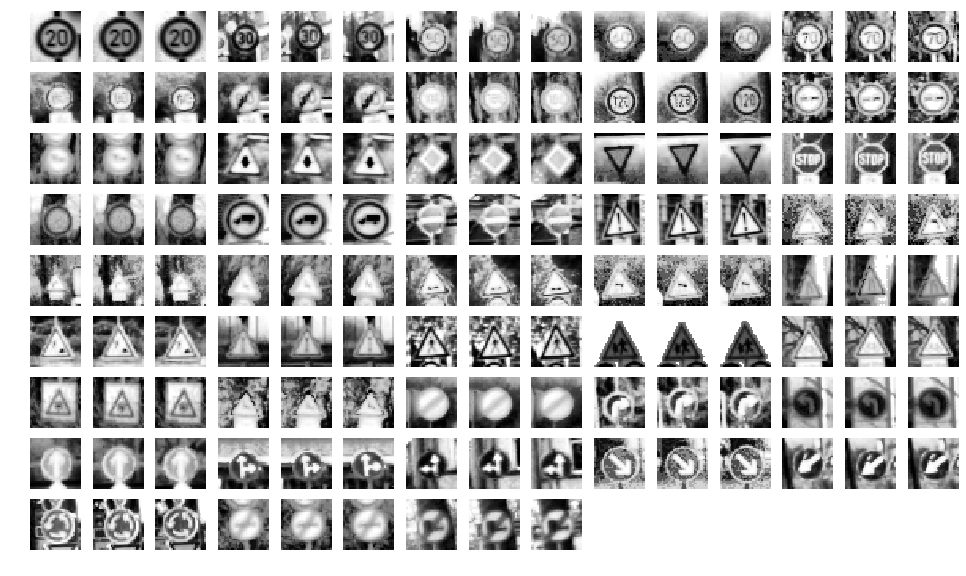

In [18]:
# test imgs
index = 0
plt.figure(figsize=(15,15),dpi=80)
for i in range(n_classes):
    for j in range(1,4):
        index = index + 1
        plt.subplot(15,15,index)
        X_picked = X_train[y_train == i]
        plt.imshow(X_picked[j],cmap='gray')
        plt.axis('off')
plt.show()

### Model Architecture

In [76]:
### Define your architecture here.
### helper funcions
conv1_act = None
conv2_act = None
def weight_var(shape,mu,sigma):
    return tf.Variable(tf.truncated_normal(shape=shape,mean=mu,stddev=sigma))

def bias_var(depth):
    return tf.Variable(tf.zeros(depth))

def conv_2d(x,W,strides=[1,1,1,1],padding='VALID'):
    return tf.nn.conv2d(input=x,filter=W,strides=strides,padding=padding)


def max_pooling(x):
    return tf.nn.max_pool(value=x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

### model architecture
def my_net(x):
    # for  Step 4 (Optional) only
    global conv1_act, conv2_act
    mu = 0 
    sigma = 0.1
    #layer 1 
    #input =32X32X1 output = 28X28X32
    conv1_depth = 32
    conv1_W = weight_var((5,5,1,conv1_depth),mu,sigma)
    conv1_b = bias_var(conv1_depth)
    conv1 = conv_2d(x,conv1_W) + conv1_b
    #activation
    conv1_act =conv1= tf.nn.relu(conv1)
    #pooling - input = 28X28X32 output = 14X14X32
    conv1 = max_pooling(conv1)
    
    # Layer 2
    #input = 14X14X16 ouput = 10X10X64
    conv2_depth = 64
    conv2_W = weight_var((5,5,conv1_depth,conv2_depth),mu,sigma)
    conv2_b = bias_var(conv2_depth)
    conv2 = conv_2d(conv1,conv2_W) + conv2_b
    #activation
    conv2_act = conv2= tf.nn.relu(conv2)
    #pooling - input = 10X10X64 output = 5X5X64
    conv2 = max_pooling(conv2)
    
    # FLatten 
    #input = 5X5X64 output =1600
    fc0 = flatten(conv2)
    fc0 = tf.nn.dropout(fc0,keep_prob=keep_prob)
    
    #layer 3: fulled connected
    #input = 1600 output =120
    fc1_depth = 120
    fc1_W = weight_var((1600,fc1_depth),mu,sigma)
    fc1_b = bias_var(fc1_depth)
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    #activation
    fc1 = tf.nn.relu(fc1)
    #dropout
    fc1 = tf.nn.dropout(fc1,keep_prob=keep_prob)
    
    # layer4: fulled connected
    #input = 120, output = 84
    fc2_depth = 84
    fc2_W = weight_var((120,fc2_depth),mu,sigma)
    fc2_b = bias_var(fc2_depth)
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    #activation
    fc2 = tf.nn.relu(fc2)
    #dropout
    fc2 = tf.nn.dropout(fc2,keep_prob=keep_prob)
    
    # layter5 :fulled connected
    #input = 84, output = n_classes
    fc3_W = weight_var((84,n_classes),mu,sigma)
    fc3_b = bias_var(n_classes)
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    
    return logits
    


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [77]:
# prep data
X_train = np.expand_dims(X_train, axis=3)
X_valid = np.expand_dims(X_valid, axis=3)
X_test = np.expand_dims(X_test, axis=3)


In [83]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
# training pipeline


# Hyper parameters
learning_rate = 0.001
traing_keep_prob  = 0.6
tf.reset_default_graph()

# input placeholders
keep_prob = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32, (None,  X_train.shape[1], X_train.shape[2], X_train.shape[3]))
y = tf.placeholder(tf.int64, (None))
one_hot_y = tf.one_hot(y, n_classes)



logits = my_net(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)
# evaluate
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()


In [84]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:1.00})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [85]:
# training session
EPOCHS = 30
BATCH_SIZE = 256

X_train_copy = np.copy(X_train)
y_train_copy = np.copy(y_train)
with tf.Session() as sess:
    print("Initializing...")
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_copy, y_train_copy = shuffle(X_train_copy, y_train_copy)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_copy[offset:end], y_train_copy[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob:traing_keep_prob})
        
        train_accuray = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(train_accuray))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './model/traffic_sign_model.ckpt')
    print("Model saved")

Initializing...
Training...

EPOCH 1 ...
Training Accuracy = 0.488
Validation Accuracy = 0.439

EPOCH 2 ...
Training Accuracy = 0.753
Validation Accuracy = 0.692

EPOCH 3 ...
Training Accuracy = 0.884
Validation Accuracy = 0.851

EPOCH 4 ...
Training Accuracy = 0.930
Validation Accuracy = 0.894

EPOCH 5 ...
Training Accuracy = 0.958
Validation Accuracy = 0.938

EPOCH 6 ...
Training Accuracy = 0.972
Validation Accuracy = 0.954

EPOCH 7 ...
Training Accuracy = 0.980
Validation Accuracy = 0.964

EPOCH 8 ...
Training Accuracy = 0.986
Validation Accuracy = 0.972

EPOCH 9 ...
Training Accuracy = 0.987
Validation Accuracy = 0.972

EPOCH 10 ...
Training Accuracy = 0.990
Validation Accuracy = 0.973

EPOCH 11 ...
Training Accuracy = 0.992
Validation Accuracy = 0.975

EPOCH 12 ...
Training Accuracy = 0.994
Validation Accuracy = 0.973

EPOCH 13 ...
Training Accuracy = 0.995
Validation Accuracy = 0.974

EPOCH 14 ...
Training Accuracy = 0.996
Validation Accuracy = 0.977

EPOCH 15 ...
Training Accura

In [86]:
with tf.Session() as sess:
    saver.restore(sess, './model/traffic_sign_model.ckpt')
    
    train_accuracy = evaluate(X_train, y_train)
    print("Training Accuracy = {:.3f}".format(train_accuracy)) 
    
    valid_accuracy = evaluate(X_valid, y_valid)
    print("Validation Accuracy = {:.3f}".format(valid_accuracy)) 
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./model/traffic_sign_model.ckpt
Training Accuracy = 0.999
Validation Accuracy = 0.984
Test Accuracy = 0.964


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

original pictures...


<Figure size 1080x1440 with 0 Axes>

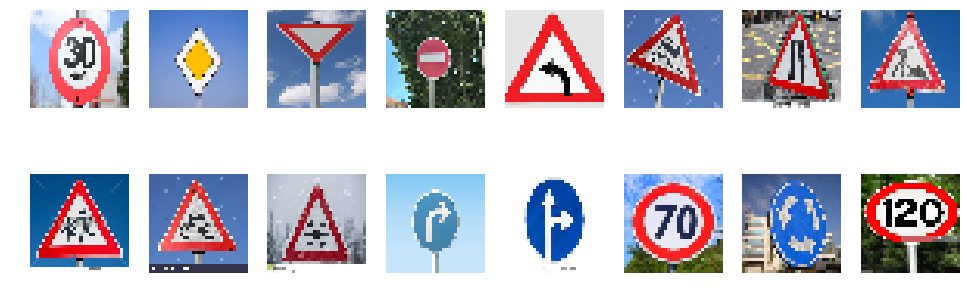

processed pictures...


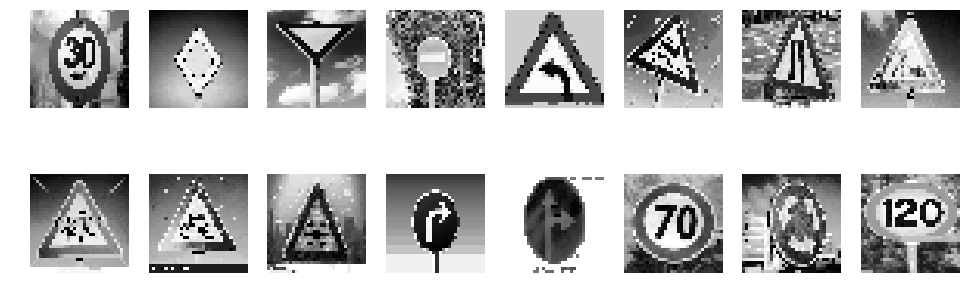

In [87]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import csv
import pandas as pd
%matplotlib inline

sign_names = {}

# with open('signnames.csv', 'rt') as csvfile:
#     reader = csv.reader(csvfile)
#     for row in reader:
#         sign_names[row[0]] = row[1]

sign_df = pd.read_csv('signnames.csv')
sign_df.set_index('ClassId')
sign_names = sign_df['SignName'].values
test_images = []
test_images_sign_id = []
test_images_sign_names = []
path = './test_images/'

plt.figure(figsize=(15, 20))

for image in os.listdir(path):
    img = cv2.imread(path+image)

    img = cv2.resize(img, (32,32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_images.append(img)
    img_id = int(image.split("-",1)[0])
    test_images_sign_id.append(img_id)
    test_images_sign_names.append(sign_df[sign_df.index==img_id]["SignName"].values[0] )        
    
test_images = np.array(test_images)

# plot images 
plt.figure(figsize=(15,5),dpi=80)
proecessed_test_images = preprocess(test_images)
print("original pictures...")
for i, image in enumerate(test_images):
    plt.subplot(2,8,i+1)
    plt.imshow(image), plt.axis('off')
plt.show()
plt.figure(figsize=(15,5),dpi=80)
print("processed pictures...")
for i, image in enumerate(proecessed_test_images):
    plt.subplot(2,8,i+1),plt.axis('off')
    plt.imshow(image,cmap='gray')
    
plt.show()



### Predict the Sign Type for Each Image

In [88]:
prediction_operation = tf.argmax(logits, 1)
def predict(X_data):
    num_examples = len(X_data)
    predicted_results = []
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        possiblility = sess.run(prediction_operation, feed_dict={x: batch_x,keep_prob:1.00})
        predicted_results.append(possiblility)
    return predicted_results

def predict_id(img):
    img = np.expand_dims(img,axis=0)
    img = np.expand_dims(img,axis=3)
    pred_result = predict(img)
    return pred_result[0]

loading trained model...
INFO:tensorflow:Restoring parameters from ./model/traffic_sign_model.ckpt
model has been loaded


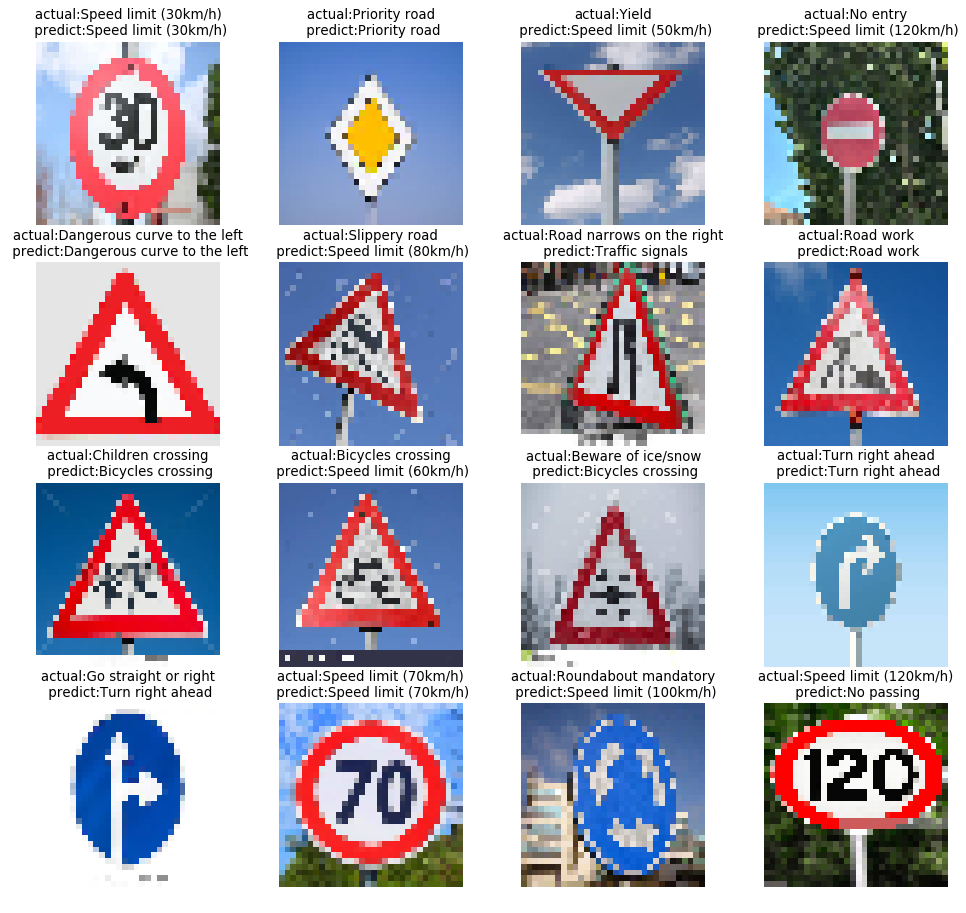

['Speed limit (30km/h)', 'Priority road', 'Speed limit (50km/h)', 'Speed limit (120km/h)', 'Dangerous curve to the left', 'Speed limit (80km/h)', 'Traffic signals', 'Road work', 'Bicycles crossing', 'Speed limit (60km/h)', 'Bicycles crossing', 'Turn right ahead', 'Turn right ahead', 'Speed limit (70km/h)', 'Speed limit (100km/h)', 'No passing']


In [89]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
predicted_sign_names = []
print("loading trained model...")
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess,'./model/traffic_sign_model.ckpt')
    print("model has been loaded")
    for i in range(0,len(proecessed_test_images)):
        predicted_id = predict_id(proecessed_test_images[i])
        predicted_sign_name = sign_df[sign_df.index==predicted_id[0]]["SignName"].values[0]
        predicted_sign_names.append(predicted_sign_name)
    

plt.figure(figsize=(15,14),dpi=80)
for i in range(len(proecessed_test_images)):
    plt.subplot(4,4,i+1)
    plt.title("actual:"+ test_images_sign_names[i] +"\n predict:" + predicted_sign_names[i])
    plt.imshow(test_images[i]), plt.axis('off')
plt.show()

print(predicted_sign_names)


# plt.show()

### Analyze Performance

In [90]:
### Calculate the accuracy for these 5 new images. 
num_of_correct = 0
len_image_list = len(test_images_sign_names)
for  i in range(len_image_list):
    if test_images_sign_names[i] == predicted_sign_names[i] :
        num_of_correct += 1

print("number of corrected predict is " +str(num_of_correct) + " out of " + str(len_image_list))
print("accuracy rate is " +str(float(num_of_correct/len_image_list)))
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

number of corrected predict is 6 out of 16
accuracy rate is 0.375


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

loading trained model agian to get top 5 possiblities...
INFO:tensorflow:Restoring parameters from ./model/traffic_sign_model.ckpt
model has been loaded


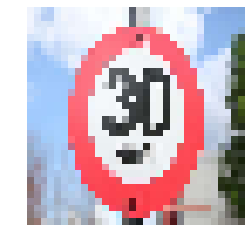

0.952 Speed limit (30km/h)
0.024 Speed limit (20km/h)
0.008 Speed limit (50km/h)
0.006 Speed limit (80km/h)
0.002 Speed limit (60km/h)
"Correct!"
Actual:Speed limit (30km/h) !!!


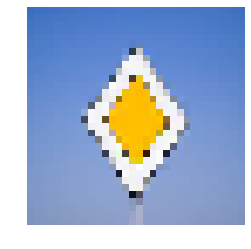

0.413 Priority road
0.085 Speed limit (50km/h)
0.050 Speed limit (100km/h)
0.045 Speed limit (80km/h)
0.041 Keep right
"Correct!"
Actual:Priority road !!!


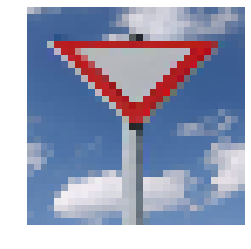

0.495 Speed limit (50km/h)
0.249 Go straight or right
0.133 Keep right
0.048 Priority road
0.024 End of no passing by vehicles over 3.5 metric tons
"Wrong!"
Actual:Yield !!!


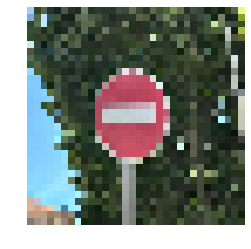

0.772 Speed limit (120km/h)
0.170 Speed limit (100km/h)
0.041 Speed limit (70km/h)
0.007 Speed limit (80km/h)
0.004 Speed limit (50km/h)
"Wrong!"
Actual:No entry !!!


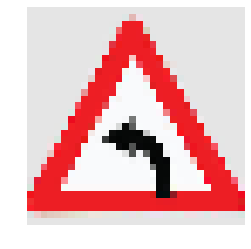

0.916 Dangerous curve to the left
0.067 Slippery road
0.010 Double curve
0.007 Wild animals crossing
0.000 Bicycles crossing
"Correct!"
Actual:Dangerous curve to the left !!!


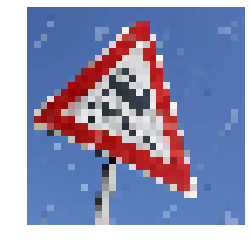

0.712 Speed limit (80km/h)
0.217 Speed limit (60km/h)
0.039 Keep right
0.011 Speed limit (50km/h)
0.005 Speed limit (30km/h)
"Wrong!"
Actual:Slippery road !!!


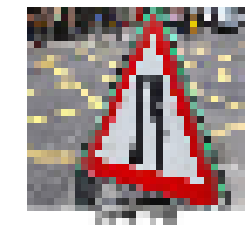

0.946 Traffic signals
0.054 General caution
0.000 Road narrows on the right
0.000 Bumpy road
0.000 Pedestrians
"Wrong!"
Actual:Road narrows on the right !!!


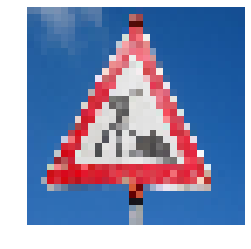

0.941 Road work
0.012 Beware of ice/snow
0.012 Wild animals crossing
0.010 Double curve
0.006 Dangerous curve to the right
"Correct!"
Actual:Road work !!!


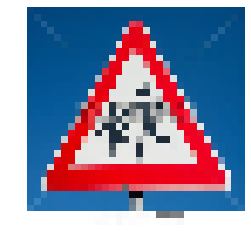

0.291 Bicycles crossing
0.100 Wild animals crossing
0.093 Speed limit (50km/h)
0.066 Speed limit (60km/h)
0.060 Children crossing
"Wrong!"
Actual:Children crossing !!!


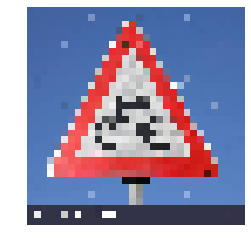

0.363 Speed limit (60km/h)
0.150 Keep right
0.108 Speed limit (80km/h)
0.058 End of speed limit (80km/h)
0.057 Beware of ice/snow
"Wrong!"
Actual:Bicycles crossing !!!


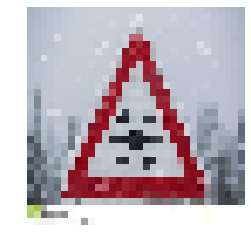

0.495 Bicycles crossing
0.410 Beware of ice/snow
0.091 Road narrows on the right
0.002 Slippery road
0.001 Wild animals crossing
"Wrong!"
Actual:Beware of ice/snow !!!


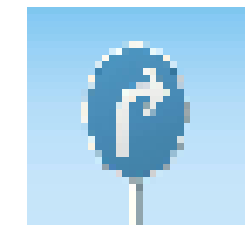

0.779 Turn right ahead
0.150 Right-of-way at the next intersection
0.034 Roundabout mandatory
0.015 Ahead only
0.008 Turn left ahead
"Correct!"
Actual:Turn right ahead !!!


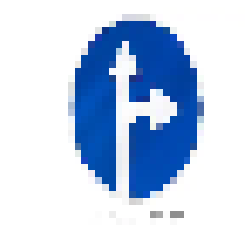

0.815 Turn right ahead
0.126 Ahead only
0.057 Turn left ahead
0.000 No vehicles
0.000 Stop
"Wrong!"
Actual:Go straight or right !!!


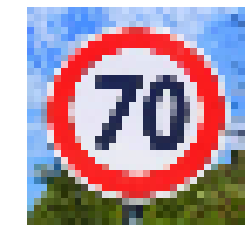

1.000 Speed limit (70km/h)
0.000 Speed limit (20km/h)
0.000 Speed limit (30km/h)
0.000 Speed limit (120km/h)
0.000 No vehicles
"Correct!"
Actual:Speed limit (70km/h) !!!


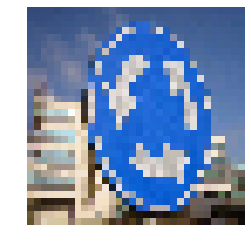

0.343 Speed limit (100km/h)
0.127 Roundabout mandatory
0.070 Speed limit (50km/h)
0.062 Speed limit (80km/h)
0.058 Bicycles crossing
"Wrong!"
Actual:Roundabout mandatory !!!


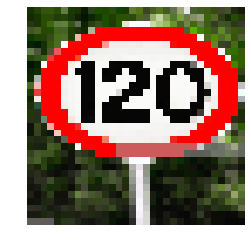

0.754 No passing
0.124 No passing for vehicles over 3.5 metric tons
0.075 Slippery road
0.040 Dangerous curve to the left
0.003 End of no passing
"Wrong!"
Actual:Speed limit (120km/h) !!!


In [91]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
def print_top_five(img):
    img = np.expand_dims(img,axis=0)
    img = np.expand_dims(img,axis=3)
    top5 = sess.run(tf.nn.top_k(tf.nn.softmax(logits), 5), feed_dict={x: img, keep_prob: 1.0})
    for (v,i) in zip(top5.values[0], top5.indices[0]):
        print("{0:.3f} {1}".format(v, sign_names[i]))

        

print("loading trained model agian to get top 5 possiblities...")
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess,'./model/traffic_sign_model.ckpt')
    print("model has been loaded")
    for i in range(0,len(proecessed_test_images)):
        plt.imshow(test_images[i]),plt.axis("off")
        plt.show()
        print_top_five(proecessed_test_images[i])
        if(test_images_sign_names[i] == predicted_sign_names[i]):
            print("\x1b[32m\"Correct!\"\x1b[0m")
        else:
            print("\x1b[31m\"Wrong!\"\x1b[0m")
        print("Actual:"+ test_images_sign_names[i] +" !!!")


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


Loading model...
INFO:tensorflow:Restoring parameters from ./model/traffic_sign_model.ckpt
model has been loaded

End of no passing


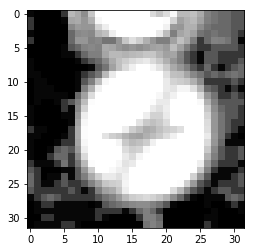

C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


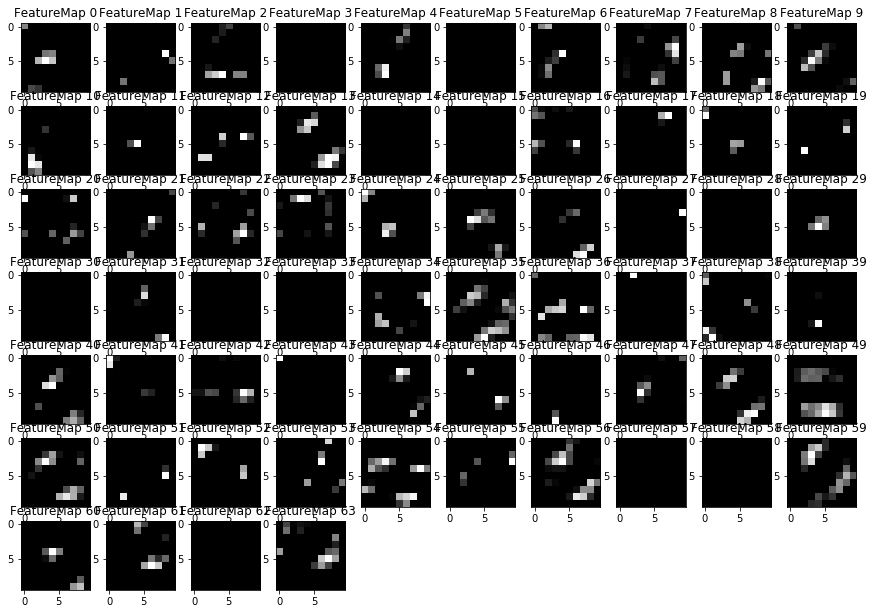

In [92]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(10,10, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
            
def testOutputFeatureMap(img):
    img = np.expand_dims(img, axis=0)
    outputFeatureMap(img, conv1_act)
    outputFeatureMap(img, conv2_act)

print("Loading model...")
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess,'./model/traffic_sign_model.ckpt')
    print("model has been loaded")

    print()
    print(sign_names[y_train[0]])
    plt.imshow(np.squeeze(X_train[0], axis=2), cmap='gray', vmin=-1, vmax=1)
    plt.show()
    testOutputFeatureMap(X_train[0])